In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [115]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [116]:
# tips
# 1. 컬럼의 이름 변경 >> 총금액 팁 성별 흡연여부 요일 시간 인원
# 2. 총금액, 팁 소수점 첫재자리 까리 유지 나머지 값은 반올림
# 3. 식사 인원, 성별 팁의 비율의 평균의 값을 구하고 시각화 바 그래프

In [117]:
tips.columns = ["총금액", "팁", "성별", "흡연여부", "요일", "시간", "인원"]

In [118]:
tips[["총금액", "팁"]] = tips[["총금액", "팁"]].round(1)
tips.head(5)

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4


In [119]:
# 팁 비율 = 팁 / (총 금액  - 팁) * 100

tips["팁비율"] = tips["팁"] / (tips["총금액"] - tips["팁"]) * 100



In [120]:
# 그룹화 
# 인원, 성별 

group_tip = tips.groupby(["인원", "성별"]).mean()["팁비율"]

C:\Users\이주노\AppData\Local\Temp\ipykernel_75016\27827755.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_tip = tips.groupby(["인원", "성별"]).mean()["팁비율"]


In [121]:
group_tip.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [122]:
# tips.groupby(["인원", "성별"]).sum()[["팁"]] / tips["팁"].sum()

In [123]:
len(group_tip.index)

12

In [124]:
list(range(0,len(group_tip.index),1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

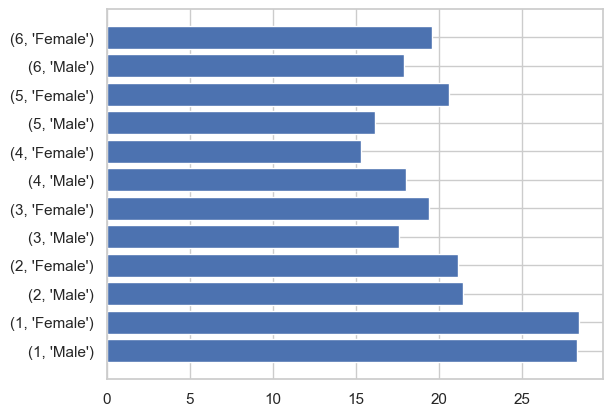

In [125]:
x = list(range(0,len(group_tip.index),1))
y = group_tip

plt.barh(x,y)
plt.yticks(x,group_tip.index)
plt.show()

In [126]:
# index > 리스트 안 튜플의 형태

In [127]:
group_data = tips.groupby(["인원", "성별"]).mean()[["팁비율"]]

C:\Users\이주노\AppData\Local\Temp\ipykernel_75016\3388687254.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(["인원", "성별"]).mean()[["팁비율"]]


In [129]:
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index :
    if i[1] == "Male" :
        data = group_data.loc[[i]]
        male_data = pd.concat([male_data, data])
    else :
        data = group_data.loc[[i]]
        female_data = pd.concat([female_data, data])

In [130]:
male_data

,,팁비율
인원,성별,
1,Male,28.358209
2,Male,21.454980
3,Male,17.613898
4,Male,18.034672
5,Male,16.145399
6,Male,17.924718


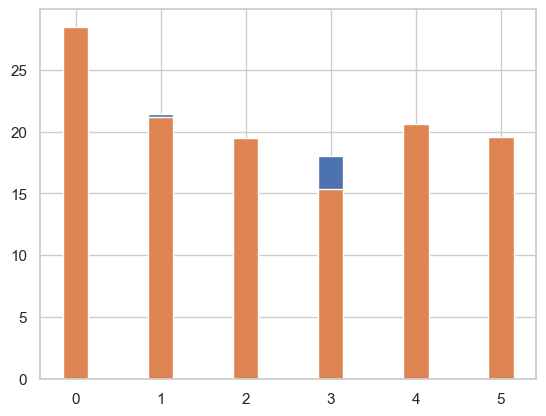

In [145]:
x = list(range(len(male_data)))
# x2 = list(1,range(len(male_data)+1,1))
y1 = male_data["팁비율"]
y2 =female_data["팁비율"]

plt.bar(x,y1, width=0.3)
plt.bar(x,y2, width=0.3)
plt.show()

In [141]:
titanic = sns.load_dataset("titanic")[["age", "sex", "class", "fare", "survived"]]
titanic.head(2)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1


In [146]:
# pivot_table
# 1.그룹화
# 2.열 인덱스
# 3.행 인덱스
# 4.데이터의 값
# 5.데이터의 집계

In [150]:
pv1 = pd.pivot_table(titanic, index= "class", columns= "sex" , values= "age", aggfunc= "mean" ) # 기준이 되는 데이터 프레임 >등급별로 그룹화 > 데이터들의 나이 선택 > 나이의 평균
pv1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [154]:
# 등급별로 성별 생존자 수 
pv2 = pd.pivot_table(titanic, index= "class", columns= "sex" , values= "survived", aggfunc= "sum" )
pv2

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


<AxesSubplot: ylabel='class'>

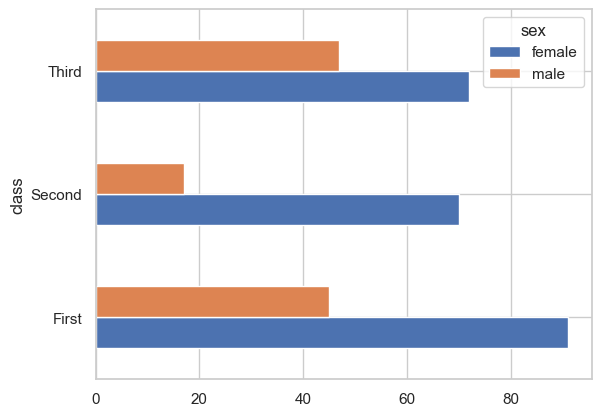

In [155]:
pv2.plot.barh()

In [163]:
# 자리등급과 성별에 따라 생존자와 사망자의 나이의 평균 

pv3 = pd.pivot_table(titanic, index= ["class","sex"], columns= "survived" , values= "age", aggfunc= ["mean", "sum"] )
pv3

mean                sum         
survived               0          1       0        1
class  sex                                          
First  female  25.666667  34.939024    77.0  2865.00
       male    44.581967  36.248000  2719.5  1449.92
Second female  36.000000  28.080882   216.0  1909.50
       male    33.369048  16.022000  2803.0   240.33
Third  female  23.818182  19.329787  1310.0   908.50
       male    27.255814  22.274211  5860.0   846.42

<AxesSubplot: ylabel='class,sex'>

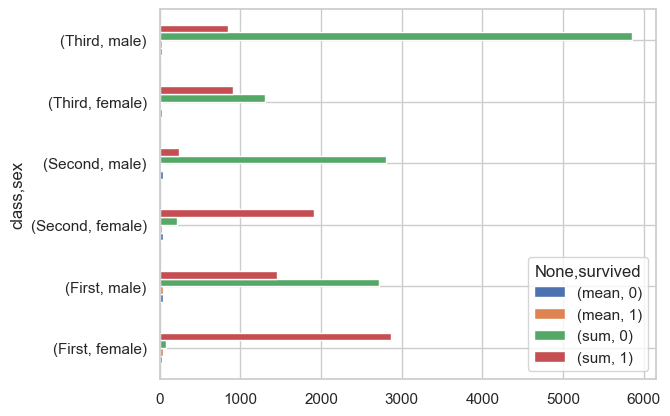

In [161]:
pv3.plot.barh()

In [166]:
pv3.xs("male", level="sex")

mean                sum         
survived          0          1       0        1
class                                          
First     44.581967  36.248000  2719.5  1449.92
Second    33.369048  16.022000  2803.0   240.33
Third     27.255814  22.274211  5860.0   846.42

In [173]:
# fillna()
# ()안 특정 문자열이나 결측치를 채워주는 함수
# 후의 행의 값을 자기고 그 값으로 대체 : "bfill" 
# 전의 행의 값을 가지고 그 값으로 대체 : "ffill"

In [174]:
corona = pd.read_csv("../csv/corona.csv")
corona.head(3)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN


In [179]:
corona["accExamCnt"].fillna(method= "bfill")

0      21518073.0
1      21518073.0
2      21518073.0
3      21518073.0
4      21518073.0
          ...    
815      261335.0
816      248647.0
817      234998.0
818      222395.0
819      210144.0
Name: accExamCnt, Length: 820, dtype: float64

In [180]:
corona["accExamCnt"].fillna(corona["accExamCnt"].mean())

0      7.545057e+06
1      7.545057e+06
2      7.545057e+06
3      7.545057e+06
4      7.545057e+06
           ...     
815    2.613350e+05
816    2.486470e+05
817    2.349980e+05
818    2.223950e+05
819    2.101440e+05
Name: accExamCnt, Length: 820, dtype: float64